In [1]:
import pandas as pd

In [2]:
df_orders = pd.read_csv('sample_submission.csv')

In [3]:
products_tables = [
  'tab_2_products_2020-01-01.csv',
  'tab_2_products_2020-01-11.csv',
  'tab_2_products_2020-01-21.csv',
  'tab_2_products_2020-01-31.csv',
  'tab_2_products_2020-02-10.csv',
  'tab_2_products_2020-03-01.csv',
  'tab_2_products_2020-03-11.csv',
  'tab_2_products_2020-03-21.csv',
  'tab_2_products_2020-03-31.csv',
  'tab_2_products_2020-04-10.csv',
  'tab_2_products_2020-04-20.csv',
  'tab_2_products_2020-04-30.csv',
  'tab_2_products_2020-05-20.csv',
  'tab_2_products_2020-05-30.csv',
  'tab_2_products_2020-06-09.csv',
  'tab_2_products_2020-06-19.csv',
  'tab_2_products_2020-06-29.csv',
  'tab_2_products_2020-07-19.csv',
  'tab_2_products_2020-07-29.csv',
  'tab_2_products_2020-08-08.csv',
  'tab_2_products_2020-08-18.csv',
  'tab_2_products_2020-08-28.csv',
  'tab_2_products_2020-09-07.csv',
]

df_products = []
for i,product_table in enumerate(products_tables):
    df_products.append(pd.read_csv(product_table))

In [4]:
df_full_products = pd.concat([*df_products])

In [5]:
df_orders = pd.read_csv('tab_1_orders.csv')

df_categories = pd.read_csv('tab_3_categories.csv')

df_user_profiles = pd.read_csv('tab_4_user_profiles.csv')

df_product_properties = pd.read_csv('tab_5_product_properties.csv')

df_city = pd.read_csv('tab_6_city.csv')

df_sample_submission_sample = pd.read_csv('sample_submission.csv')

In [27]:
df_products[0].head()

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
0,525,5354800,28381452,116.000000,4,0.00,Лазанья Золотой Петушок мясной слоеный пирог з...,37548,Золотой Петушок,101.0,99
1,525,5354800,29242911,56.990002,2,13.08,Хлеб Хлебный Дом Геркулес зерновой с отрубями ...,5636,Хлебный Дом,596.0,51
2,525,5354800,29242919,64.989998,2,40.02,Тортилья Delicados оригинальная пшеничная,22107,Delicados,596.0,51
3,525,5354800,29243785,44.990002,6,0.00,Вода питьевая минеральная BonAqua газированная...,2530,BonAqua,77.0,74
4,525,5354800,29244246,65.900002,6,30.99,"Газированный напиток Mirinda Апельсин 1,5 л",3818486,Mirinda,76.0,74


In [28]:
df_full_orders = pd.merge(df_orders, df_full_products, how='inner', on=["order_id"] )

In [29]:
df_full_orders = df_full_orders[df_full_orders['product_id'] != 0]

In [30]:
df_full_orders = df_full_orders.drop(["parent_category_id","master_category_id","product_name","line_item_id", "user_id_y"],axis=1)

In [31]:
df_full_orders['user_id'] = df_full_orders['user_id_x']
df_full_orders = df_full_orders.drop(["user_id_x"],axis=1)

In [32]:
df_full_orders['discount'] = df_full_orders.discount.apply(lambda d: max(0,d))

In [33]:
df_full_orders['price'] = (df_full_orders['price'] - df_full_orders["discount"]) * df_full_orders["quantity"]

In [34]:
df_full_orders = df_full_orders.drop(["discount","quantity"],axis=1)

In [35]:
df_gb = df_full_orders.groupby(['retailer', 'platform'])

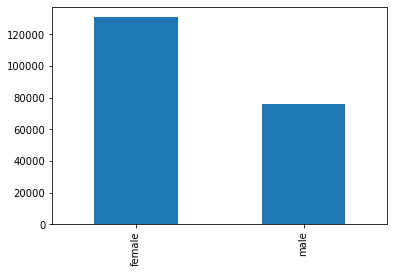

In [36]:
df_user_profiles['gender'].value_counts().plot.bar()

In [37]:
import numpy as np

In [38]:
retailers = df_full_orders.retailer.unique()
platforms = np.array(['web', 'app'])


array(['METRO', 'ВкусВилл', 'Ашан', 'Бахетле', 'SELGROS', 'Лента',
       'Азбука Вкуса', 'BILLA', 'REAL', 'МЕГАМАРТ', 'ВИКТОРИЯ',
       'МАГНОЛИЯ', 'ЗЕЛЕНОЕ ЯБЛОКО', 'Командор', 'КИТ', 'Аллея', 'ТИТАН',
       'Быстроном', 'Фреш25', 'ЮгОпт', 'Home Market', 'ВЕГА', 'Хороший',
       'ИДЕЯ', 'КАРАВАН', 'ТЦ "Новомариинский" ', 'Оптоклуб РЯДЫ',
       'Столичный', 'ПАРУС', 'БЕГЕМАГ', 'СберМаркет', 'СИГМА', 'ДЕЯ',
       'УДАЧНАЯ ПОКУПКА', 'ТД ХОРОШИЙ', 'Забайкальский Привозъ', 'Мегас',
       'МаксМаркет', 'Шан', 'СЕДЬМАЯ СТОЛИЦА', 'Осень', 'АУТЛЕТ',
       'ТЦ STOЛИЦА', 'Улыбка Радуги', 'АГРОКОМПЛЕКС'], dtype=object)

In [39]:
top_50_products = df_full_orders.product_id.value_counts()[:50].index

In [40]:
r = df_gb['product_id'].value_counts()

In [41]:
def fill_to_50(top_50_per_retailer_and_platform,top_50_products):
    new_predictions = {}
    
    for rp, predictions in top_50_per_retailer_and_platform.items():
        new_prediction = predictions[:50]
        if len(predictions) < 50:
            new_prediction = np.concatenate((predictions,top_50_products))[:50]
        new_predictions[rp] = ' '.join(list(str(x) for x in new_prediction))
    return new_predictions

In [68]:
top_50_products = df_full_orders.product_id.value_counts()[:50].index

top_50_per_retailer_and_platform = {}
for retailer in retailers:
    for platform in platforms:
            if platform in r.loc[retailer]:
                try:
                    top_50_per_retailer_and_platform[(retailer,platform)] = r.loc[retailer][platform][:50].index
                except KeyError:
                    print(retailer)
                    print(platform)
                    

top_50_products_per_retailer = {}
df_gb_retailers = df_full_orders.groupby(["retailer"]).product_id.value_counts()
for retailer in retailers:
    top_50_products_per_retailer[retailer] = df_gb_retailers.loc[retailer][:50].index
    
top_50_products_per_platform = {}
df_gb_platforms = df_full_orders.groupby(["platform"]).product_id.value_counts()
for platform in platforms:
    top_50_products_per_platform[platform] = df_gb_platforms.loc[platform][:50].index

In [69]:
top_50_per_retailer_and_platform = fill_to_50(top_50_per_retailer_and_platform, top_50_products)
top_50_products_per_retailer = fill_to_50(top_50_products_per_retailer, top_50_products)
top_50_products_per_platform = fill_to_50(top_50_products_per_platform, top_50_products)
top_50_products_str = ' '.join(list(str(x) for x in top_50_products))
top_50_per_retailer_and_platform

{('METRO',
  'web'): '709 55133 1300 55134 3817542 63072 3817484 5469728 69669 5479511 100789 5217 39590 3817489 166 72006 94333 67694 9959 39591 176 158 72875 5479153 304 687 5476137 100812 10163 94227 5061792 165 100849 54728 5642 5481691 14564 3302557 3497570 105764 7397 3817512 655 20276 5469736 24831 3302524 5479797 661 21904',
 ('METRO',
  'app'): '709 55133 1300 5469728 55134 3817484 5217 63072 5479511 3817542 39590 69669 166 100789 3817489 9959 72875 67694 158 72006 94333 39591 54728 176 687 165 304 5642 100849 100812 14564 5481691 5479153 5469736 5476137 68465 49911 9425 7397 3817512 5061792 20276 21904 3497570 661 36067 981 10163 24831 14630',
 ('ВкусВилл',
  'web'): '88103 88073 88077 3817735 88074 88295 88025 97616 88023 4274697 88028 88012 88456 88027 88898 88088 88060 88349 88795 88021 88811 88757 88102 89075 3302668 88420 89217 88370 88242 88011 88990 88238 88710 97688 89044 3302760 88504 88157 88101 88371 201347 201477 201483 3302749 88070 88075 3817808 88175 88372 8853

In [97]:
# top_50_products
# top_50_products_per_retailer
# top_50_products_per_platform
# top_50_per_retailer_and_platform
def predict(row):
    return top_50_products_str
#     retailer = row['retailer']
#     platform = row['platform']
#     if type(retailer) != str and  type(platform) != str:
#         if math.isnan(retailer) and math.isnan(platform):
#             return top_50_products_str
#         elif math.isnan(retailer):
#             return top_50_products_per_retailer[retailer]
#         elif math.isnan(platform) or platform == 'undefined':
#             return top_50_products_per_platform[platform]
#         else:
#             return top_50_per_retailer_and_platform[(retailer,platform)]
#     elif platform == 'undefined':
#         return top_50_products_str
#     elif retailer not in retailers:
#         top_50_products_per_platform[platform]
#     else:
#         return top_50_per_retailer_and_platform[(retailer,platform)]

In [98]:
#Get Prediction 

In [49]:
df_predict = df_sample_submission.merge(df_orders, how="left", left_on="Id", right_on="user_id")

In [50]:
df_predict.dropna(subset=['Id'],inplace=True)

In [51]:
import math

In [52]:
df_predict['old_predicted'] = df_predict['Predicted']

In [53]:
df_predict['order_created_time'].isnull().sum()

2830

In [54]:
df_predict.dropna(subset=["order_created_time"], inplace=True)

In [55]:
import datetime 
date_before = datetime.datetime.strptime("2020-09-17 00:00:00", '%Y-%m-%d %H:%M:%S')
df_predict['datetime'] = df_predict["order_created_time"].apply(lambda t: datetime.datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))

In [56]:
clean_df_predict = df_predict[df_predict.datetime > date_before].sort_values(by=["user_id","order_created_time"]).drop_duplicates(subset=['user_id'], keep='first')

In [57]:
clean_df_predict.shape

(45055, 10)

In [99]:
clean_df_predict['Predicted_new'] = clean_df_predict.apply(predict,axis=1)

In [100]:
clean_df_predict.head()

,Id,Predicted,user_id,order_id,order_created_time,retailer,store_id,platform,old_predicted,datetime,Predicted_new
164191,576,12914417 6741079 2919862 7013351 5313983 10341...,576.0,17151229.0,2020-09-22 10:58:26,SELGROS,4.0,app,12914417 6741079 2919862 7013351 5313983 10341...,2020-09-22 10:58:26,709 39590 166 55133 3497419 67694 1300 5469728...
825688,608,4611932 5054228 5772112 6104709 951918 939069 ...,608.0,16955655.0,2020-09-19 03:43:50,Ашан,171.0,web,4611932 5054228 5772112 6104709 951918 939069 ...,2020-09-19 03:43:50,709 39590 166 55133 3497419 67694 1300 5469728...
24,766,12773054 3692749 12726751 10041624 11893515 23...,766.0,16926225.0,2020-09-18 12:16:57,METRO,2.0,web,12773054 3692749 12726751 10041624 11893515 23...,2020-09-18 12:16:57,709 39590 166 55133 3497419 67694 1300 5469728...
597428,1012,887314 8900863 205146 8282385 7896668 8582316 ...,1012.0,17546773.0,2020-09-27 19:32:17,METRO,10.0,web,887314 8900863 205146 8282385 7896668 8582316 ...,2020-09-27 19:32:17,709 39590 166 55133 3497419 67694 1300 5469728...
922038,1474,2849273 10954858 9809344 3641089 9850289 13386...,1474.0,17221664.0,2020-09-23 14:25:34,Ашан,172.0,app,2849273 10954858 9809344 3641089 9850289 13386...,2020-09-23 14:25:34,709 39590 166 55133 3497419 67694 1300 5469728...


In [101]:
df_sample_submission = df_sample_submission.merge(clean_df_predict[["user_id","Predicted_new"]], how="outer", left_on="Id", right_on="user_id")

In [102]:
def fillnans(p):
    if type(p) == str:
        return p
    elif p is None or math.isnan(p):
        return top_50_products_str
    else:
        return top_50_products_str
    
df_sample_submission['Predicted_new'] = df_sample_submission['Predicted_new'].apply(fillnans)

In [103]:
df_sample_submission["Predicted"] = df_sample_submission["Predicted_new"]
df_sample_submission = df_sample_submission.drop(["Predicted_new", "user_id"],axis=1)

df_sample_submission.to_csv('predictions2.csv', index=False)

In [91]:
df_sample_submission.dropna(subset=["Id"], inplace=True)

In [93]:
df_sample_submission.head()

,Id,Predicted
0,51,709 39590 166 55133 3497419 67694 1300 5469728...
1,65,709 39590 166 55133 3497419 67694 1300 5469728...
2,766,709 55133 1300 55134 3817542 63072 3817484 546...
3,1132,709 39590 166 55133 3497419 67694 1300 5469728...
4,1578,88103 88074 3817735 88073 88025 88295 97616 88...


In [94]:
df_sample_submission_sample = pd.read_csv('sample_submission.csv')

In [82]:
df_sample_submission_sample.pr()

,Id,Predicted
0,51,3239211 10720024 8493844 1965540 5009002 95218...
1,65,11693356 13392267 2464515 2245175 4748570 1134...
2,766,12773054 3692749 12726751 10041624 11893515 23...
3,1132,8613934 3599065 575614 4821474 11609320 699047...
4,1578,289404 4328240 3129788 9390886 11166655 173077...


In [96]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107068 entries, 0 to 107067
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Id         107068 non-null  int64 
 1   Predicted  107068 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.5+ MB
